#Returns 
github: @guzmanwolfrank

A quantative analysis program code. 

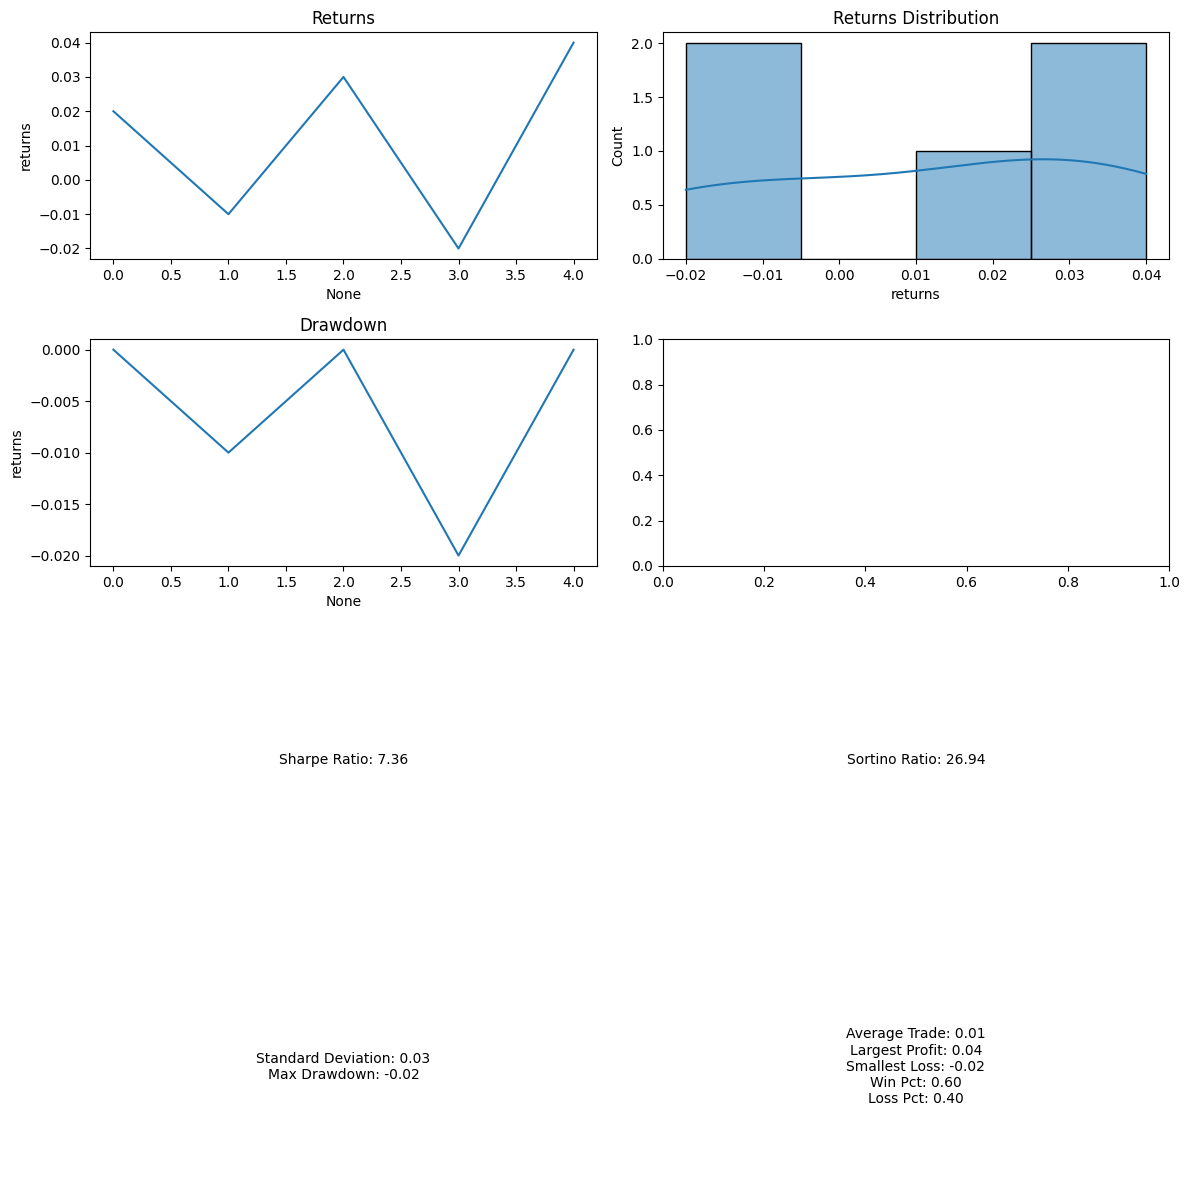

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import HTML
import plotly.express as px  # For interactive charts (optional)

def drawdown(return_series):
    cum_returns = (1 + return_series).cumprod()
    peak = cum_returns.cummax()
    drawdown = (cum_returns - peak) / peak
    return drawdown

# Sample data (replace with your DataFrame)
data = {'returns': [0.02, -0.01, 0.03, -0.02, 0.04]}
df = pd.DataFrame(data)

returns = df['returns']

# Calculate additional metrics
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)
sortino_ratio = (returns.mean() - 0) / returns[returns < 0].std() * np.sqrt(252)
std_dev = returns.std()
max_drawdown = drawdown(returns).min()
average_trade = returns.mean()
largest_profit = returns.max()
smallest_loss = returns.min()
win_pct = (returns > 0).mean()
loss_pct = (returns < 0).mean()

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

# Plot returns
sns.lineplot(x=returns.index, y=returns, ax=axes[0, 0])
axes[0, 0].set_title('Returns')

# Plot histogram of returns
sns.histplot(returns, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Returns Distribution')

# Plot drawdown
sns.lineplot(x=drawdown(returns).index, y=drawdown(returns), ax=axes[1, 0])
axes[1, 0].set_title('Drawdown')

# Placeholder for trade count histogram (requires trade direction data)
# sns.barplot(x=trade_counts.index, y=trade_counts, ax=axes[1, 1])
# axes[1, 1].set_title('Trade Count')

# Sharpe ratio and Sortino ratio
axes[2, 0].text(0.5, 0.5, f'Sharpe Ratio: {sharpe_ratio:.2f}', ha='center', va='center', transform=axes[2, 0].transAxes)
axes[2, 1].text(0.5, 0.5, f'Sortino Ratio: {sortino_ratio:.2f}', ha='center', va='center', transform=axes[2, 1].transAxes)
axes[2, 0].axis('off')
axes[2, 1].axis('off')

# Other metrics
axes[3, 0].text(0.5, 0.5, f'Standard Deviation: {std_dev:.2f}\nMax Drawdown: {max_drawdown:.2f}', ha='center', va='center', transform=axes[3, 0].transAxes)
axes[3, 1].text(0.5, 0.5, f'Average Trade: {average_trade:.2f}\nLargest Profit: {largest_profit:.2f}\nSmallest Loss: {smallest_loss:.2f}\nWin Pct: {win_pct:.2f}\nLoss Pct: {loss_pct:.2f}', ha='center', va='center', transform=axes[3, 1].transAxes)
axes[3, 0].axis('off')
axes[3, 1].axis('off')

plt.tight_layout()
plt.show()
